In [1]:
# Multiple Linear Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
# set theme
sns.set()
sns.set(rc={'figure.figsize':(10,8)})

In [2]:
# Importing the dataset
dataset = pd.read_csv('50_Startups.csv')
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


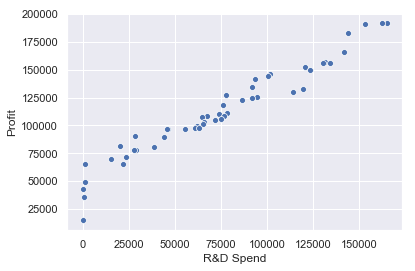

In [3]:
# R&D Spend vs profit checking for outliers
sns.scatterplot(data = dataset, x = 'R&D Spend', y = 'Profit');

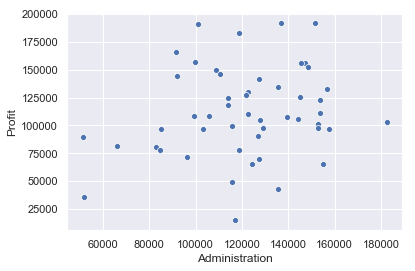

In [4]:
# Administration vs profit checking for outliers
sns.scatterplot(data = dataset, x = 'Administration', y = 'Profit');

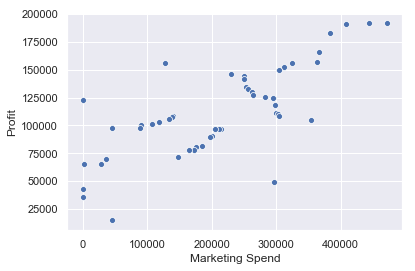

In [5]:
# Marketing Spend vs profit checking for outliers
sns.scatterplot(data = dataset, x = 'Marketing Spend', y = 'Profit');

In [6]:
# creating dummy variables for State column
# drop_first = True  --- to remove the dummy variable trap

dataset = pd.get_dummies(dataset, columns = ['State'], drop_first = True)
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [7]:
X = dataset.loc[:, dataset.columns[dataset.columns != 'Profit']]
X.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [8]:
y = dataset.loc[:, 'Profit']
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

### Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

For linear regression, no need to go for feature scaling as sklearns library will take care of that for us.

## Fitting algorithm to our training set

In [11]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
# Predicting the Test set results
# y-pred will have vector of predictions for dependant variables
y_pred = regressor.predict(X_test)

In [13]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [14]:
pd.DataFrame({'y_test' : y_test, 'y_pred': y_pred})

,y_test,y_pred
28,103282.38,103015.201598
11,144259.40,132582.277608
10,146121.95,132447.738452
41,77798.83,71976.098513
2,191050.39,178537.482211
27,105008.31,116161.242302
38,81229.06,67851.692097
31,97483.56,98791.733747
22,110352.25,113969.435330
4,166187.94,167921.065696


In [15]:
#X = dataset.iloc[:, :-1].values
#y = dataset.iloc[:, 4].values